In [1]:
import os
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
df15 = pd.read_csv("../../Dataset/14-02-2018(Time).csv", low_memory = False)
df15 = df15.drop([0,1])
df15['Timestamp']= pd.to_datetime(df15['Timestamp'])
df15 = df15.sort_values(by=['Timestamp'])
df15 = df15.drop(columns = ['Timestamp'])

In [3]:
df15

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
410758,0.0,0.0,-11873000000.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
410759,0.0,0.0,-681402000000.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
410760,0.0,0.0,-919011000000.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,284112452380.952,193152417061.482,754847000000.0,12603000000.0,Benign
410761,0.0,0.0,-273850000000.0,282.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,339450312500.0,243268209256.922,979781000000.0,7758000000.0,Benign
411984,0.0,0.0,-529801000000.0,505.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,333755554687.5,237751721149.946,948431000000.0,4908000000.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720761,3389.0,6.0,5120281.0,11.0,8.0,1138.0,2754.0,677.0,0.0,103.4545454545,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
871091,0.0,0.0,112636522.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,56318261.0,42.4264068712,56318291.0,56318231.0,Benign
876765,445.0,6.0,330963.0,6.0,5.0,455.0,338.0,140.0,0.0,75.8333333333,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
795036,3389.0,6.0,2056637.0,8.0,7.0,1128.0,1581.0,661.0,0.0,141.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [4]:
df16Aux = pd.read_csv("../../Dataset/02-03-2018(Time).csv", low_memory = False)
df16Aux = df16Aux.drop([0,1])
df16Aux['Timestamp']= pd.to_datetime(df16Aux['Timestamp'])
df16Aux = df16Aux.sort_values(by=['Timestamp'])
df16Aux = df16Aux.drop(columns = ['Timestamp'])

In [5]:
listOrd = df15.columns.tolist()
df16 = pd.DataFrame()
for colu in listOrd:
    df16[colu] = df16Aux[colu]

In [6]:
df16Aux = None

In [7]:
df16

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
234326,3389.0,6.0,1708771.0,8.0,7.0,1144.0,1581.0,677.0,0.0,143.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
954264,3389.0,6.0,4387548.0,10.0,7.0,1138.0,1581.0,677.0,0.0,113.8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
215351,8080.0,6.0,10163.0,3.0,4.0,326.0,129.0,326.0,0.0,108.6666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
733281,57935.0,6.0,159.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
106890,8080.0,6.0,11345.0,3.0,4.0,326.0,129.0,326.0,0.0,108.6666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142291,8080.0,6.0,10895.0,3.0,4.0,326.0,129.0,326.0,0.0,108.6666667,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1042191,445.0,6.0,1253148.0,7.0,5.0,364.0,582.0,103.0,0.0,52.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
838119,3389.0,6.0,1676164.0,8.0,7.0,1144.0,1581.0,677.0,0.0,143.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
430133,51109.0,6.0,32.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [8]:
input_label15 = np.array(df15.loc[:, df15.columns != "Label"]).astype(np.float)
output_label15 = np.array(df15["Label"])
out = []
for o in output_label15:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label15= out

In [9]:
input_label16 = np.array(df16.loc[:, df16.columns != "Label"]).astype(np.float)
output_label16 = np.array(df16["Label"])
out = []
for o in output_label16:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_label16 = out

In [10]:
dfAE = pd.concat([df15, df16])
input_labelAE = np.array(dfAE.loc[:, dfAE.columns != "Label"]).astype(np.float)
output_labelAE = np.array(dfAE["Label"])
out = []
for o in output_labelAE:
    if(o == "Benign"):out.append(0)
    else: out.append(1)
output_labelAE = out

In [11]:
dfAE = None
df15 = None
df16 = None
out = None

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(input_labelAE)
input_label15 = scaler.transform(input_label15)
input_label16 = scaler.transform(input_label16)
input_labelAE = scaler.transform(input_labelAE)

## AutoEncoder

In [13]:
input_labelAE, output_labelAE = shuffle(input_labelAE, output_labelAE)

In [14]:
inp_train,inp_test,out_train,out_test = train_test_split(input_labelAE, input_labelAE, test_size=0.2)

In [15]:
input_model = keras.layers.Input(shape = (78,))
enc = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(input_model)
enc = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
enc = keras.layers.Dense(units = 18, activation = "relu")(enc)
dec = keras.layers.Dense(units = 36, activation = "relu", use_bias = True)(enc)
dec = keras.layers.Dense(units = 64, activation = "relu", use_bias = True)(dec)
dec = keras.layers.Dense(units = 78, activation = "relu", use_bias = True)(dec)
auto_encoder = keras.Model(input_model, dec)

In [16]:
encoder = keras.Model(input_model, enc)
decoder_input = keras.layers.Input(shape = (18,))
decoder_layer = auto_encoder.layers[-3](decoder_input)
decoder_layer = auto_encoder.layers[-2](decoder_layer)
decoder_layer = auto_encoder.layers[-1](decoder_layer)
decoder = keras.Model(decoder_input, decoder_layer)

In [17]:
auto_encoder.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00025), loss = "mean_squared_error", metrics = ['accuracy'])

In [18]:
train = auto_encoder.fit(x = np.array(inp_train), y = np.array(out_train),validation_split= 0.1, epochs = 10, verbose = 1, shuffle = True)

Epoch 1/10
47009/47009 [==============================] - 51s 1ms/step - loss: 0.0192 - accuracy: 0.0859 - val_loss: 0.0162 - val_accuracy: 0.0078
Epoch 2/10
47009/47009 [==============================] - 47s 1ms/step - loss: 0.0162 - accuracy: 0.1233 - val_loss: 0.0162 - val_accuracy: 0.0796 ETA: 8s - loss: 0.016 - E - ETA: 4s - - ETA: 3s - loss: - ETA: 2s - l
Epoch 3/10
47009/47009 [==============================] - 48s 1ms/step - loss: 0.0162 - accuracy: 0.1313 - val_loss: 0.0162 - val_accuracy: 0.0556
Epoch 4/10
47009/47009 [==============================] - 51s 1ms/step - loss: 0.0162 - accuracy: 0.1345 - val_loss: 0.0162 - val_accuracy: 0.1886
Epoch 5/10
47009/47009 [==============================] - 52s 1ms/step - loss: 0.0162 - accuracy: 0.1368 - val_loss: 0.0162 - val_accuracy: 0.2601TA: 23s - loss: 0.0162 - - ETA: 22s - loss: 0.0162 - a - ETA: 21s - loss: 0.0162 - accuracy: 0.13 - ETA: 21s - loss: 0.0162 - accuracy: 0. - ETA: 21s - loss: 0.0162 - accuracy: 0. - ETA: 20s - los

In [19]:
predict = auto_encoder.predict(inp_test)
losses = keras.losses.mean_squared_error(out_test, predict).numpy()
total = 0
for loss in losses:
    total += loss
print(total / len(losses))

0.011431165244306131


In [20]:
inp_train = None
inp_test = None
out_train = None
out_test = None
input_labelAE = None

In [21]:
input_label15 = encoder.predict(input_label15)
input_label16 = encoder.predict(input_label16)

In [22]:
tamanhoSequencia = 10

In [23]:
inp = []
out = []
num = 0
for i in range(len(input_label15) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label15[j])
    inp.append(aux)
    out.append(output_label15[i + tamanhoSequencia - 1])
input_label15 = inp
output_label15 = out

In [24]:
inp = []
out = []
num = 0
for i in range(len(input_label16) - tamanhoSequencia + 1):
    aux = []
    for j in range(i, i + tamanhoSequencia):
        aux.append(input_label16[j])
    inp.append(aux)
    out.append(output_label16[i + tamanhoSequencia - 1])
input_label16 = inp
output_label16 = out

In [25]:
inp = None
out = None

## Classificador

In [26]:
model = keras.Sequential([
    keras.layers.LSTM(units = 16, input_shape = ((tamanhoSequencia,18)), return_sequences = True, use_bias = True),
    keras.layers.LSTM(units = 8, return_sequences = False, use_bias = True),
    keras.layers.Dense(units = 2, activation = "softmax")
])
model.compile(optimizer= keras.optimizers.Adam(lr= 0.00025), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [27]:
model.fit(x = np.array(input_label15), y = np.array(output_label15), validation_split= 0.1, epochs = 10, verbose = 1)

Epoch 1/10
29384/29384 [==============================] - 172s 6ms/step - loss: 0.1090 - accuracy: 0.9551 - val_loss: 0.0020 - val_accuracy: 0.9996
Epoch 2/10
29384/29384 [==============================] - 171s 6ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0018 - val_accuracy: 0.9996
Epoch 3/10
29384/29384 [==============================] - 169s 6ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 4/10
29384/29384 [==============================] - 178s 6ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 5/10
29384/29384 [==============================] - 175s 6ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 6/10
29384/29384 [==============================] - 176s 6ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0016 - val_accuracy: 0.9997
Epoch 7/10
29384/29384 [==============================] - 176s 6ms/step - loss: 0.0017 - accuracy: 0.9997 - val_

In [28]:
input_label15 = None
output_label15 = None

In [29]:
resu = model.predict(np.array(input_label16))

In [30]:
res = [np.argmax(r) for r in resu]

In [31]:
cm = confusion_matrix(y_true = np.array(output_label16).reshape(len(output_label16)), y_pred = np.array(res))

In [32]:
def plot_confusion_matrix(cm, classes, normaliza = False, title = "Confusion matrix", cmap = plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normaliza:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)
    
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[757997    333]
 [286186      0]]


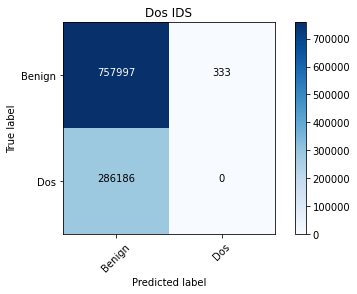

In [33]:
labels = ["Benign", "Dos"]
plot_confusion_matrix(cm = cm, classes = labels, title = "Dos IDS")

In [34]:
output_label16 = np.array(output_label16).reshape(len(output_label16))
res = np.array(res)
fpr, tpr, _ = roc_curve(output_label16,  res)
auc = roc_auc_score(output_label16, res)

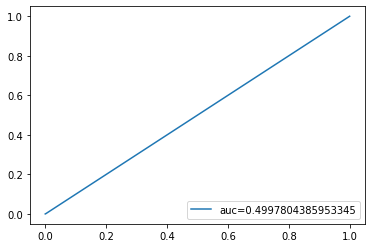

In [35]:
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)
plt.show()